# Leonardo Monsalvo --> T00047540

## Taller de Regresión Lineal

In [55]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np

In [56]:
a = 1 #Variables temporales
b = 2 
alphas = [5e-1, 5e-2, 5e-3, 5e-4, 5e-5]
e = len(alphas)
alpha = 5e-1
iteraciones = 1000

In [57]:
f = np.loadtxt("blood_pressure.txt")
l = f[:,1]
xs = f[:,0]
def normalization(dato):
    n=len(dato) 
    prom = sum(dato)/n 
    featureXma = max(dato)
    featureYmi = min(dato)
    
    tot = ((dato-prom)/(featureXma-featureYmi))
    return (tot)

def featureX():    
    x = f[:,0]
    x = normalization(x)
    return (x)

def featureY():
    
    y = f[:,1]
    y = normalization(y)
    return (y)

In [58]:
def value(x, y, a, b):
    m = int(len(x)*0.3)#Prueba real del 30%
    error = 0
    for i in range(m):
        hipotesis = a+b*x[i]
        error +=(y[i] - hipotesis)**2
    return error/(2*m)

def descenso_gradiente(x, y, a, b, alpha, iteracion):
    m = int(len(x)*0.7)#Entrenamiento de 70% 
    hist_coste = []
    for ep in range(iteracion):
        #Operaciones parciales
        b_deriv = 0
        a_deriv = 0
        
        #Se inicia la sumatoria
        for i in range(m):
            hipotesis = a+b*x[i] #Se calculan los valores de la hipotesis para cada indice
            
            #Calculo respectivo para cada derivada y se guarda en el vector.
            a_deriv += hipotesis - y[i]
            b_deriv += (hipotesis - y[i]) * x[i]
            hist_coste.append(value(x, y, a, b))
        a -= (a_deriv / m) * alpha
        b -= (b_deriv / m) * alpha
        
    return a, b, hist_coste

def prediction(a, b, val):
    return a+b*val

In [59]:
x = featureX()
y = featureY()
a,b, hist_coste = descenso_gradiente(x, y, a, b, alphas[0], iteraciones)#Mejor ajuste de aprendizaje

print ("\tFORMA DE LA HIPOTESIS\n")
print("H(x) = {} + {}x".format(a,b)) #recta con mejor ajuste
print ("\n\tFORMA DEL ERROR\n")
print("error= {}".format(value(x, y, a, b)))

	FORMA DE LA HIPOTESIS

H(x) = -0.00181481872208742 + 0.4652865185242025x

	FORMA DEL ERROR

error= 0.028162258560861457


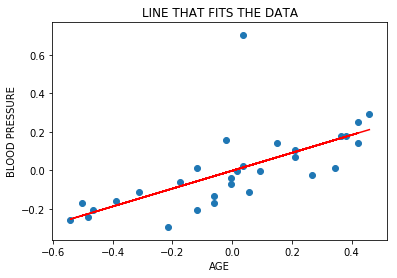

In [60]:
y_pred=prediction(a,b,x)
plt.scatter(x,y)
plt.title('LINE THAT FITS THE DATA')
plt.xlabel("AGE")
plt.ylabel("BLOOD PRESSURE")
plt.plot(x,y_pred, color='red')
plt.show()

In [61]:
for i in range (e):
    
    pressure = prediction(xs[i],b,l[i])
    print("Alfa de {} los {} años se tendrá una presión sanguínea de {:.1f}".format(alphas[i],xs[i],pressure))

Alfa de 0.5 los 39.0 años se tendrá una presión sanguínea de 106.0
Alfa de 0.05 los 47.0 años se tendrá una presión sanguínea de 149.4
Alfa de 0.005 los 45.0 años se tendrá una presión sanguínea de 109.2
Alfa de 0.0005 los 47.0 años se tendrá una presión sanguínea de 114.5
Alfa de 5e-05 los 65.0 años se tendrá una presión sanguínea de 140.4
